# Logistic Regression

**Telecom Churn case study**


### Importing and Merging data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing all dataset

churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [3]:
churn_data.head(3)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
customer_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [5]:
internet_data.tail(3)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No
7042,3186-AJIEK,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [6]:
#Merging on CustomerID

df_1 = pd.merge(churn_data,customer_data, how = "inner", on = "customerID")

In [7]:
df_1.head(3)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No


In [11]:
telecom = pd.merge(df_1,internet_data, how = "inner",on = "customerID")
telecom.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No


In [12]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


# Data preparation

In [26]:
for label,content in df_tmp.items():
    if  pd.api.types.is_numeric_dtype(content):
        print(label)

customerID
tenure
PhoneService
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn
gender
SeniorCitizen
Partner
Dependents
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies


In [17]:
df_tmp = telecom.copy()

In [18]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes

In [22]:
df_tmp["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [28]:
df_tmp["customerID"][:10]

0    5375
1    3962
2    2564
3    5535
4    6511
5    6551
6    1002
7    4770
8    5604
9    4534
Name: customerID, dtype: int16

In [36]:
# dff_tmp = df_tmp.copy()

# pm = pd.get_dummies(dff_tmp["PaymentMethod"],prefix = "PaymentMethod",drop_first = True)

# print(pm[:10])

In [37]:
df_tmp["gender"].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [40]:
df_tmp["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [41]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int8   
 3   Contract          7043 non-null   int8   
 4   PaperlessBilling  7043 non-null   int8   
 5   PaymentMethod     7043 non-null   int8   
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   int16  
 8   Churn             7043 non-null   int8   
 9   gender            7043 non-null   int8   
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int8   
 12  Dependents        7043 non-null   int8   
 13  MultipleLines     7043 non-null   int8   
 14  InternetService   7043 non-null   int8   
 15  OnlineSecurity    7043 non-null   int8   
 16  OnlineBackup      7043 non-null   int8   


In [42]:
#Checking for outliers in the continuous variable
num_telecom = df_tmp[["tenure","MonthlyCharges","SeniorCitizen","TotalCharges"]]

In [43]:
#checking outliers at 25%,50%,75%,90%,95%,99%
num_telecom.describe(percentiles= [.25,.50,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,3257.794122
std,24.559481,30.090047,0.368612,1888.693496
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,1609.000000
50%,29.000000,70.350000,0.000000,3249.000000
75%,55.000000,89.850000,0.000000,4901.500000
90%,69.000000,102.600000,1.000000,5876.800000
95%,72.000000,107.400000,1.000000,6206.900000
99%,72.000000,114.729000,1.000000,6465.580000


The numbers are gradually increasing.There is no outliers based on shown distribution

In [44]:
# Checking for missing values
df_tmp.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

## Feature Standardisation

In [45]:
df_tmp.tail(6)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7037,1758,72,1,2,1,0,21.15,770,0,0,...,0,0,0,2,1,1,1,1,1,1
7038,4853,24,1,1,1,3,84.80,1597,0,1,...,1,1,2,0,2,0,2,2,2,2
7039,1525,72,1,1,1,1,103.20,5698,0,0,...,1,1,2,1,0,2,2,0,2,2
7040,3367,11,0,0,1,2,29.60,2994,0,0,...,1,1,1,0,2,0,0,0,0,0
7041,5934,4,1,0,1,3,74.40,2660,1,1,...,1,0,2,1,0,0,0,0,0,0
7042,2226,66,1,2,1,0,105.65,5407,0,1,...,0,0,0,1,2,0,2,2,2,2


In [46]:
# Normalizing continuous features
df = df_tmp[["tenure","MonthlyCharges","TotalCharges"]]

In [47]:
norm_df = (df - df.mean())/df.std()

In [48]:
telecom = df_tmp.drop(["tenure","MonthlyCharges","TotalCharges"],axis = 1)

In [50]:
telecom = pd.concat([telecom,norm_df],axis = 1)
telecom

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,SeniorCitizen,Partner,Dependents,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges
0,5375,0,0,1,2,0,0,0,1,0,...,0,0,2,0,0,0,0,-1.277354,-1.160241,-0.398579
1,3962,1,1,0,3,0,1,0,0,0,...,0,2,0,2,0,0,0,0.066323,-0.259611,-0.948695
2,2564,1,0,1,3,1,1,0,0,0,...,0,2,2,0,0,0,0,-1.236636,-0.362635,-1.641767
3,5535,0,1,0,0,0,1,0,0,0,...,0,2,0,2,2,0,0,0.514215,-0.746482,-0.983640
4,6511,1,0,1,2,1,0,0,0,0,...,1,0,0,0,0,0,0,-1.236636,0.197351,-1.235136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,1,1,3,0,1,0,1,1,...,0,2,0,2,2,2,2,-0.340852,0.665945,-0.879335
7039,1525,1,1,1,1,0,0,0,1,1,...,1,0,2,2,0,2,2,1.613587,1.277443,1.292007
7040,3367,0,0,1,2,0,0,0,1,1,...,0,2,0,0,0,0,0,-0.870179,-1.168549,-0.139670
7041,5934,1,0,1,3,1,1,1,1,0,...,1,0,0,0,0,0,0,-1.155201,0.320315,-0.316512


In [52]:
#Checking the churn rate

churn = (sum(telecom["Churn"])/len(telecom["Churn"].index))*100

In [53]:
churn

26.536987079369588

Churn rate is  almost 27%

## Model Building

**Spilting  the Data into Training and Testing Set**

In [54]:
from sklearn.model_selection import train_test_split

X = telecom.drop(["customerID","Churn"],axis = 1)

y = telecom["Churn"]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 12)

In [56]:
import statsmodels.api as sm

In [57]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                            GLM   Df Residuals:                     5262
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2185.9
Date:                Sat, 15 May 2021   Deviance:                       4371.7
Time:                        02:10:04   Pearson chi2:                 5.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2374      0.207     -1.146      0.252      -0.643       0.168
PhoneService        -1.0037      0.168     -5.968      0.000      -1.333      -0.674
Contract            -0.6995      0.088     -7.913      0.000      -0.873      -0.526
PaperlessBilling     0.3159      0.086      3.669      0.000       0.147       0.485
PaymentMethod        0.0615      0.040      1.520      0.128      -0.018       0.141
gender              -0.0374      0.075     -0.499      0.618      -0.185       0.110
SeniorCitizen        0.1863      0.098      1.906      0.057      -0.005       0.378
Partner             -0.0645      0.089     -0.723      0.469      -0.239       0.110
Dependents          -0.2080      0.103     -2.011      0.044      -0.411      -0.005
MultipleLines        0.0809      0.047      1.726      0.084      -0.011       0.173
InternetService      0.3128      0.075      4.184      0.000       0.166       0.459
OnlineSecurity      -0.2701      0.048     -5.630      0.000      -0.364      -0.176
OnlineBackup        -0.1470      0.044     -3.342      0.001      -0.233      -0.061
DeviceProtection    -0.0644      0.045     -1.426      0.154      -0.153       0.024
TechSupport         -0.2612      0.049     -5.378      0.000      -0.356      -0.166
StreamingTV          0.0083      0.048      0.173      0.862      -0.086       0.102
StreamingMovies      0.0270      0.048      0.567      0.570      -0.066       0.120
tenure              -0.8721      0.068    -12.832      0.000      -1.005      -0.739
MonthlyCharges       0.9083      0.066     13.723      0.000       0.779       1.038
TotalCharges         0.1096      0.039      2.784      0.005       0.032       0.187
====================================================================================
"""

In [58]:
# Correlatin Matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


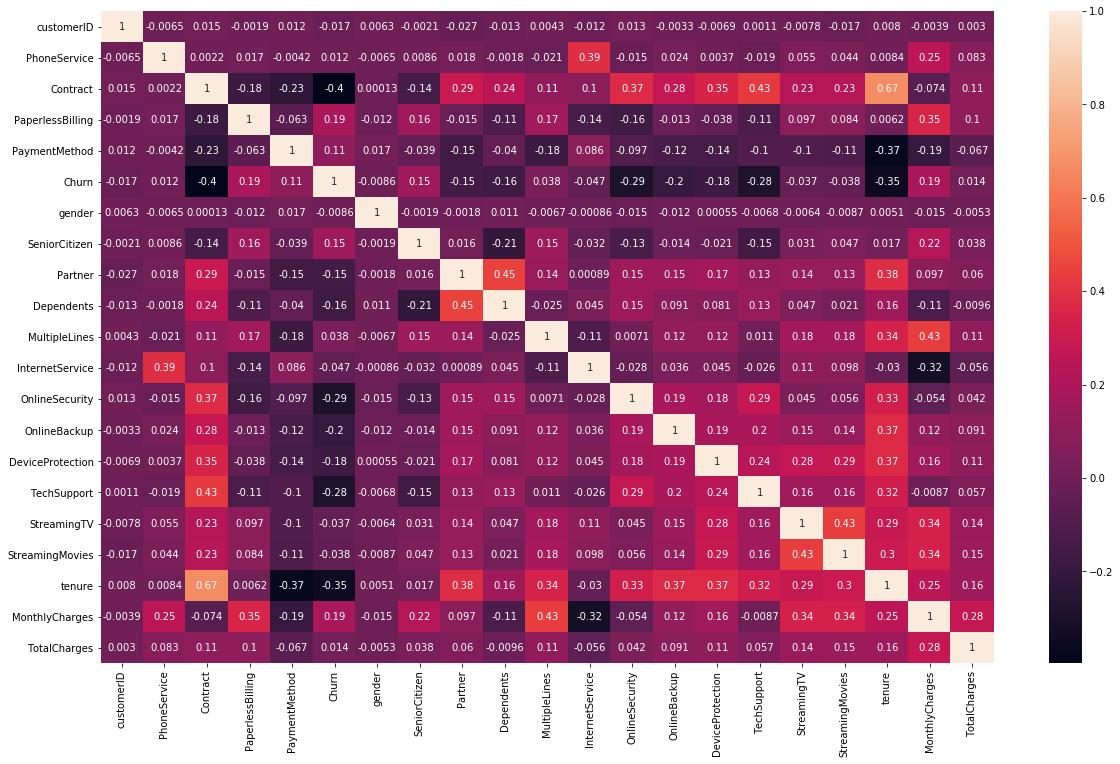

In [59]:
plt.figure(figsize = (20,12))
sns.heatmap(telecom.corr(),annot = True)

In [61]:
# Dropping high correlated varables
X_test2 = X_test.drop(["StreamingMovies","StreamingTV","DeviceProtection","gender","Partner","PaymentMethod"],axis = 1)
X_train2 = X_train.drop(["StreamingMovies","StreamingTV","DeviceProtection","gender","Partner","PaymentMethod"],axis = 1)

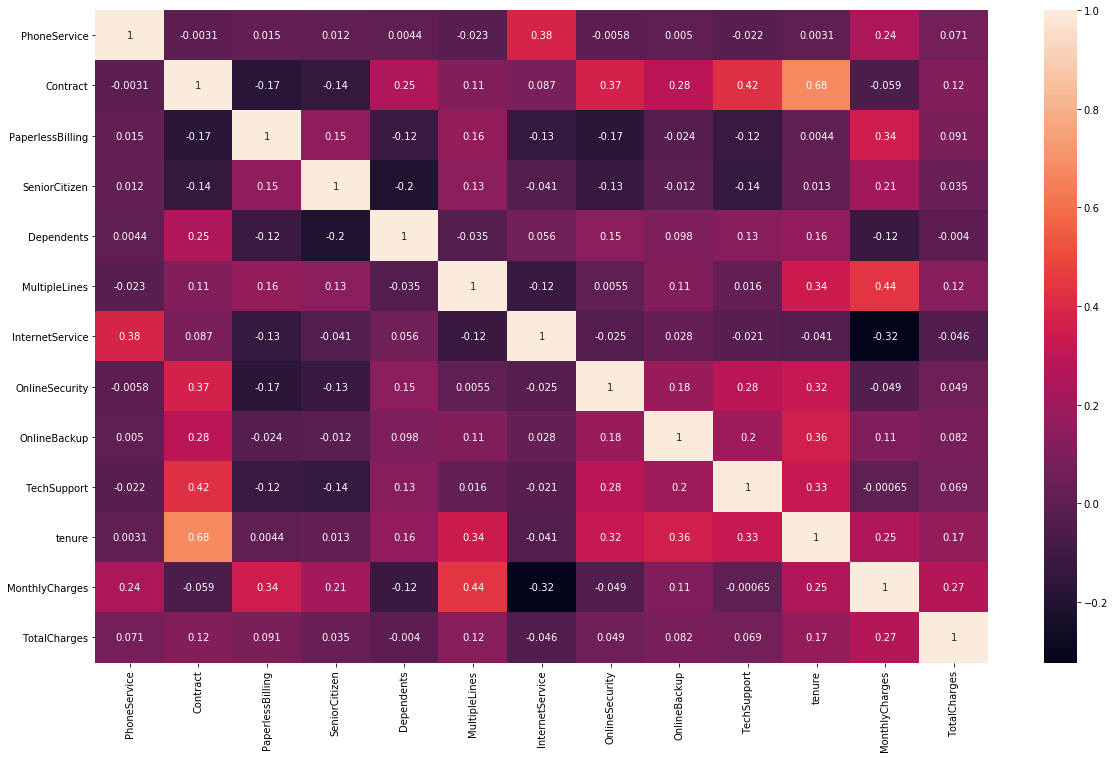

In [62]:
#After dropping highly correlated variables againg check the correletion matrix 

plt.figure(figsize = (20,12))
sns.heatmap(X_train2.corr(),annot = True)

In [63]:
#Re run the model
logml2 = sm.GLM(y_train,(sm.add_constant(X_train2)),family = sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                            GLM   Df Residuals:                     5268
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2188.7
Date:                Sat, 15 May 2021   Deviance:                       4377.3
Time:                        02:31:52   Pearson chi2:                 5.26e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1934      0.176     -1.101      0.271      -0.538       0.151
PhoneService        -1.0055      0.162     -6.194      0.000      -1.324      -0.687
Contract            -0.7122      0.087     -8.181      0.000      -0.883      -0.542
PaperlessBilling     0.3178      0.086      3.700      0.000       0.149       0.486
SeniorCitizen        0.1790      0.097      1.847      0.065      -0.011       0.369
Dependents          -0.2385      0.094     -2.527      0.011      -0.423      -0.054
MultipleLines        0.0818      0.047      1.753      0.080      -0.010       0.173
InternetService      0.3148      0.071      4.428      0.000       0.175       0.454
OnlineSecurity      -0.2717      0.048     -5.671      0.000      -0.366      -0.178
OnlineBackup        -0.1489      0.044     -3.392      0.001      -0.235      -0.063
TechSupport         -0.2628      0.048     -5.478      0.000      -0.357      -0.169
tenure              -0.9078      0.065    -13.980      0.000      -1.035      -0.781
MonthlyCharges       0.9034      0.059     15.239      0.000       0.787       1.020
TotalCharges         0.1124      0.039      2.863      0.004       0.035       0.189
====================================================================================
"""

## Feature Selection Using RFE

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

log_reg = LogisticRegression()
rfe = RFE(log_reg,13)     # running RFE with 13 variables as output
rfe.fit(X,y)

#Boolean result
print(rfe.support_)

#Ranking
print(rfe.ranking_)

[ True  True  True False False  True False  True  True  True  True  True
 False  True False False  True  True  True]
[1 1 1 3 4 1 6 1 1 1 1 1 2 1 7 5 1 1 1]


In [69]:
X.columns

Index(['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [73]:
#feature selected by rfe
col = ['PhoneService', 'Contract', 'PaperlessBilling','SeniorCitizen', 'Dependents', 'MultipleLines','tenure','InternetService'
        ,'TechSupport','OnlineSecurity', 'OnlineBackup','MonthlyCharges', 'TotalCharges']

In [75]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train[col],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Making Prediction


In [118]:
# predicted probabilities

y_pred = Log_reg.predict_proba(X_test[col])

In [119]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head(3)

,0,1
0,0.712696,0.287304
1,0.344271,0.655729
2,0.911917,0.088083


In [120]:
y_pred_1 = y_pred_df.iloc[:,[1]]

In [121]:
y_pred_1.head(2)

,1
0,0.287304
1,0.655729


In [122]:
y_test_df = pd.DataFrame(y_test)

In [123]:
#Putting customer id to index
y_test_df["CusID"] = y_test_df.index

In [124]:
#Removing index from both dataframe to append them side by side
y_pred_1.reset_index(drop = True,inplace = True)
y_test_df.reset_index(drop = True,inplace = True)

In [125]:
#Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis = 1)


In [126]:
y_pred_final.head(4)

,Churn,CusID,1
0,1,6235,0.287304
1,1,3980,0.655729
2,0,6548,0.088083
3,0,3954,0.751895


In [128]:
#renaming the column 1
y_pred_final = y_pred_final.rename(columns = {1:"Churn_prob"})

y_pred_final.tail(2)

,Churn,CusID,Churn_prob
1759,0,1246,0.332808
1760,1,4982,0.271699


In [130]:
#rearranging the columns
y_pred_final = y_pred_final.reindex(columns=["CusID","Churn","Churn_prob"])

In [131]:
y_pred_final.head(5)

,CusID,Churn,Churn_prob
0,6235,1,0.287304
1,3980,1,0.655729
2,6548,0,0.088083
3,3954,0,0.751895
4,5328,0,0.026842


In [132]:
#creating new column "Predicted" with i if the churn_prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_prob.map(lambda x:1 if x>0.5 else 0)

In [134]:
y_pred_final.tail(5)

,CusID,Churn,Churn_prob,predicted
1756,6244,0,0.519094,1
1757,4534,0,0.273604,0
1758,4407,0,0.115518,0
1759,1246,0,0.332808,0
1760,4982,1,0.271699,0


# Model Evaluation

In [135]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

In [136]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_1)

In [137]:
roc_auc_score(y_test,y_pred_1)

0.8359305550914012

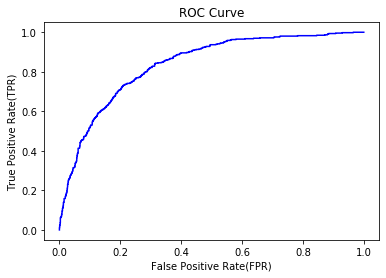

In [139]:
#visualize the roc curve

plt.plot(fpr,tpr,color = "blue",label = "ROC")
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.show()

In [141]:
#Confusion Matrix

y_preds = Log_reg.predict(X_test[col])

confusion_matrix(y_test,y_preds)

array([[1156,  145],
       [ 206,  254]], dtype=int64)

Text(15.0, 0.5, 'Predicted Label')

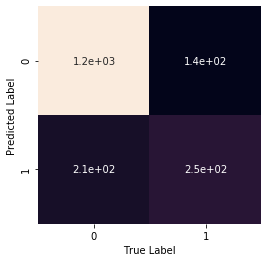

In [142]:
#Visualize the confusion plot

fig,ax = plt.subplots(figsize = (4,4))
ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot = True,
                 cbar = False)

plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [143]:
print(classification_report(y_pred_final.Churn,y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1301
           1       0.64      0.55      0.59       460

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761

